# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Muhammad Faishal Ali Dhiaulhaq
- **Email:** faishalald22@gmail.com
- **ID Dicoding:**

# Menentukan Pertanyaan Bisnis

- Pertanyaan 1
> Berapa rata-rata peminjam sepeda baik dari kategori pelanggan kasual maupun terdaftar dalam rentang 2 tahun (2011-2012) per bulan?
- Pertanyaan 2
> Faktor apa saja yang memengaruhi banyak peminjam? Serta jelaskan!

# Import Semua Packages/Library yang Digunakan

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Data Wrangling

## Gathering Data

### 1. Melakukan import dataset 

In [5]:
days = 'data/day.csv'
hours = 'data/hour.csv'

### 2. Membaca CSV menjadi dataframe

In [6]:
#dataframe per hari dalam tahun
daysDf = pd.read_csv(days)
#dataframe per jam dalam hari
hoursDf = pd.read_csv(hours)

### 3. Preview Dataframe pada 5 data pertama

In [7]:
#dataframe per hari dalam tahun
daysDf.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [8]:
#dataframe per jam dalam hari
hoursDf.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Assessing Data

### A. Penilaian pada Dataframe Days

In [9]:
#Cek total banyak baris data
daysDf.shape

(731, 16)

In [10]:
#Informasi Dasar
daysDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


###Cek Data Null

In [11]:
#Cek data null
daysDf.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### Cek Data Duplikat

In [12]:
daysDf.duplicated().sum()

0

### Cek Nilai Statistik Awal

In [13]:
daysDf.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Cek Invalid Input Kolom dteday

In [14]:
# Format Tanggal yang benar
dtFormat = re.compile(r'^\d{4}-\d{2}-\d{2}$')

# Array untuk menampung format yang salah
invDaysFormat = []

for i in daysDf['dteday']:
  #Cek terdapat kesalahan format
  #jika ada masukkan kedalam array
  if not dtFormat.match(i):
    invDaysFormat.append(i)
  else:
    # Memisahkan tahun, bulan, dan hari
    year, month, day = map(int, i.split('-'))
    # Cek apakah bulan melebihi 12 atau tahun melebihi 2012
    if month > 12 or year > 2012:
      invDaysFormat.append(i)

In [15]:
#Cek panjang array format salah
len(invDaysFormat)

0

Pada hasil penilaian (Assessing) awal di atas, terlihat beberapa poin yang dapat disimpulkan yaitu:
1.   Tidak ada data null dari setiap kolom
2.   Tidak ada data duplikat
3.   Terdapat tipe data yang salah dari kolom dteday yang seharusnya bertipe data date time
4.   Tidak terdapat invalid value dari kolom dteday


---


Catatan :
* Terdapat ketidaksesuaian nilai maksimal pada kolom weathersit, menandakan tidak ada pelanggan rental sepeda ketika cuaca sedang hujan lebat
* Pengecekan kolom dteday dilakukan karena tidak ikut terframing didalam fungsi describe. Pengecekan dengan berdasarkan tipe data string dan integer

### B. Penilaian Pada Dataframe Hours




In [16]:
#Cek total banyak baris data
hoursDf.shape

(17379, 17)

In [17]:
#Informasi Dasar
hoursDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


### Cek Data Null

In [18]:
hoursDf.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### Cek Data Duplikat

In [19]:
hoursDf.duplicated().sum()

0

### Cek Statistik Awal

In [20]:
daysDf.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Cek Invalid Input Kolom dteday

In [21]:
# Format Tanggal yang benar
dtFormat = re.compile(r'^\d{4}-\d{2}-\d{2}$')

# Array untuk menampung format yang salah
invHoursFormat = []

for i in hoursDf['dteday']:
  #Cek terdapat kesalahan format
  #jika ada masukkan kedalam array
  if not dtFormat.match(i):
    invHoursFormat.append(i)
  else:
    # Memisahkan tahun, bulan, dan hari
    year, month, day = map(int, i.split('-'))
    # Cek apakah bulan melebihi 12 atau tahun melebihi 2012
    if month > 12 or year > 2012:
      invHoursFormat.append(i)

In [22]:
#Cek panjang array format salah
len(invHoursFormat)

0

Pada hasil penilaian (Assessing) awal di atas, terlihat beberapa poin yang dapat disimpulkan yaitu:
1.   Tidak ada data null dari setiap kolom
2.   Tidak ada data duplikat
3.   Terdapat tipe data yang salah dari kolom dteday yang seharusnya bertipe data date time
4.   Tidak terdapat invalid value dari kolom dteday


---


Catatan :
* Terdapat ketidaksesuaian nilai maksimal pada kolom weathersit, menandakan tidak ada pelanggan rental sepeda ketika cuaca sedang hujan lebat
* Pengecekan kolom dteday dilakukan karena tidak ikut terframing didalam fungsi describe. Pengecekan dengan berdasarkan tipe data string dan integer

# Cleaning Data

## Mengubah Tipe Data Kolom dteday Pada DF Days

In [23]:
daysDf['dteday'] = pd.to_datetime(daysDf['dteday'])

In [24]:
#cek tipe data
daysDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Dari hasil proses di atas, tipe data pada kolom "dteday" di DaysDf sudah terubah menjadi tipe data Date Time dari tipe data Object

## Mengubah Tipe Data Kolom dteday Pada DF Hours

In [25]:
hoursDf['dteday'] = pd.to_datetime(hoursDf['dteday'])

In [26]:
#cek tipe data
daysDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Dari hasil proses di atas, tipe data pada kolom "dteday" di HoursDf sudah terubah menjadi tipe data Date Time dari tipe data Object

## Menghapus Kolom yang Tidak Digunakan pada DF Days

In [27]:
droppedColDaysDf = ['temp', 'atemp', 'hum', 'windspeed']
daysDf.drop(columns=droppedColDaysDf, inplace=True)

In [28]:
daysDf.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,82,1518,1600


## Menghapus Kolom yang Tidak Digunakan pada DF Hours

In [29]:
droppedColHoursDf = ['temp', 'atemp', 'hum', 'windspeed']
hoursDf.drop(columns=droppedColHoursDf, inplace=True)

In [30]:
hoursDf.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0,1,1


# Exploratory Data Analysis (EDA)

### Menyatakan Pertanyaan Yang Akan Dieksplor

Pertanyaan-pertanyaan itu adalah sebagai berikut:


1.   Pada rentang waktu kapan pesepeda cenderung melakukan peminjaman sepeda?
2.   Bagaimana kecenderungan peminjam dalam meminjam sepeda, apakah ketika hari kerja (Working Day) atau sebaliknya?
3.   Kondisi cuaca seperti apa yang memiliki jumlah tertinggi peminjam sepeda?
4.   Musim dengan rata-rata peminjam tertinggi itu musim apa?
5.   Bagaimana pembagian rata-rata peminjam kasual dan yang terdaftar pada rentang tahun?
6.   Apa parameter nilai yang memiliki korelasi tertinggi? (untuk analisis lanjut)


## Menjawab Pertanyaan 1

### Membuat Kategori Range Waktu

In [31]:
# Melihat nilai unique pada kolom hr
hoursDf.hr.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int64)

In [32]:
# Membuat kolom kategori rentang waktu
# Membuat fungsi mapping kategori rentang waktu
def rangeTimes(hr):
  if hr >= 0 and hr <= 3:
    return "Dawn"
  elif hr > 3 and hr <= 10:
    return "Morning"
  elif hr > 10 and hr <= 16:
    return "Afternoon"
  elif hr > 16 and hr <= 18:
    return "Evening"
  elif hr > 18:
    return "Night"

# Mengubah kolom hr menjadi list sendiri
range_times_hours_df = hoursDf.hr.tolist()
# Mengaplikasikan fungsi yang sudah dibuat
hoursDf['range_times'] = hoursDf['hr'].apply(rangeTimes)

# Tampilkan preview
hoursDf.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,casual,registered,cnt,range_times
2846,2847,2011-05-03,2,0,5,12,0,2,1,2,48,169,217,Afternoon
13907,13908,2012-08-07,3,1,8,16,0,2,1,3,101,344,445,Afternoon
12755,12756,2012-06-20,2,1,6,16,0,3,1,1,51,284,335,Afternoon
2605,2606,2011-04-23,2,0,4,11,0,6,0,2,68,164,232,Afternoon
10372,10373,2012-03-13,1,1,3,7,0,2,1,2,16,292,308,Morning


### Membuat Pivot Table Hasil Kolom Range Waktu

In [33]:
# Melakukan mapping pada range jam disertai data total peminjam baik registered maupun casual
groupedByRangeTimes = hoursDf.groupby(by='range_times').range_times.count().sort_values(ascending=False)

groupedByRangeTimes

range_times
Morning      5047
Afternoon    4372
Night        3640
Dawn         2862
Evening      1458
Name: range_times, dtype: int64

Jawab:

Dari hasil Pivot Table di atas, dapat disimpulkan bahwa frekuensi peminjam sepeda dalam rentang waktu tertinggi adalah di **Pagi Hari** dengan total 5047 peminjam secara keseluruhan.

## Menjawab Pertanyaan 2

### Pengelompokan Jenis Hari

In [34]:
# Cek Nilai Unique
hoursDf.holiday.unique()

array([0, 1], dtype=int64)

In [35]:
# Buat fungsi menambah kolom
def dayType(row):
  dayTypeName = ''
  if row['workingday'] == 0 and (row['weekday'] == 0 or row['weekday'] == 6):
    dayTypeName = 'Holiday'
    return dayTypeName
  elif row['workingday'] == 1 and row['holiday'] == 1:
    dayTypeName = 'Holiday'
    return dayTypeName
  elif row['weekday'] >= 1 and row['weekday'] <= 5:
    dayTypeName = 'Working Day'
    return dayTypeName
  elif (row['weekday'] >= 1 and row['weekday'] <= 5) and row['holiday'] == 1:
    dayTypeName = 'Holiday'
    return dayTypeName
  elif (row['holiday'] == 0 and row['workingday'] == 0) and (row['weekday'] == 0 or row['weekday'] == 6):
    dayTypeName = 'Holiday'
    return dayTypeName
  elif (row['holiday'] == 0 and row['workingday'] == 0) and (row['weekday'] >= 1 and row['weekday'] <= 5):
    dayTypeName = 'Working Day'
    return dayTypeName

# Buat Kolom Baru untuk Pivot Table
hoursDf['day_type'] = hoursDf.apply(dayType, axis=1)

In [36]:
hoursDf

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,casual,registered,cnt,range_times,day_type
0,1,2011-01-01,1,0,1,0,0,6,0,1,3,13,16,Dawn,Holiday
1,2,2011-01-01,1,0,1,1,0,6,0,1,8,32,40,Dawn,Holiday
2,3,2011-01-01,1,0,1,2,0,6,0,1,5,27,32,Dawn,Holiday
3,4,2011-01-01,1,0,1,3,0,6,0,1,3,10,13,Dawn,Holiday
4,5,2011-01-01,1,0,1,4,0,6,0,1,0,1,1,Morning,Holiday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,11,108,119,Night,Working Day
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,8,81,89,Night,Working Day
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,7,83,90,Night,Working Day
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,13,48,61,Night,Working Day


### Pengecekan apakah sudah benar pengkategoriannya

In [37]:
# Cek data weekend
hoursDf[hoursDf['day_type'] == 'Holiday'].sample(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,casual,registered,cnt,range_times,day_type
663,664,2011-01-30,1,0,1,23,0,0,0,2,5,16,21,Night,Holiday
6147,6148,2011-09-18,3,0,9,17,0,0,0,2,95,230,325,Evening,Holiday
5815,5816,2011-09-04,3,0,9,18,0,0,0,1,187,169,356,Evening,Holiday
2804,2805,2011-05-01,2,0,5,18,0,0,0,2,33,126,159,Evening,Holiday
6985,6986,2011-10-23,4,0,10,16,0,0,0,1,188,217,405,Afternoon,Holiday
950,951,2011-02-12,1,0,2,5,0,6,0,1,0,1,1,Morning,Holiday
3951,3952,2011-06-18,2,0,6,13,0,6,0,1,135,192,327,Afternoon,Holiday
7975,7976,2011-12-03,4,0,12,23,0,6,0,1,12,73,85,Night,Holiday
14355,14356,2012-08-26,3,1,8,8,0,0,0,1,21,112,133,Morning,Holiday
4454,4455,2011-07-09,3,0,7,12,0,6,0,1,145,221,366,Afternoon,Holiday


In [38]:
# Cek data weekday
hoursDf[hoursDf['day_type'] == 'Working Day'].sample(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,casual,registered,cnt,range_times,day_type
14949,14950,2012-09-20,3,1,9,2,0,4,1,1,2,9,11,Dawn,Working Day
5676,5677,2011-08-29,3,0,8,23,0,1,1,1,19,56,75,Night,Working Day
4423,4424,2011-07-08,3,0,7,5,0,5,1,1,3,24,27,Morning,Working Day
14729,14730,2012-09-10,3,1,9,22,0,1,1,1,15,144,159,Night,Working Day
4658,4659,2011-07-18,3,0,7,0,0,1,1,1,21,30,51,Dawn,Working Day
3234,3235,2011-05-19,2,0,5,16,0,4,1,1,55,247,302,Afternoon,Working Day
6549,6550,2011-10-05,4,0,10,11,0,3,1,1,32,138,170,Afternoon,Working Day
13793,13794,2012-08-02,3,1,8,22,0,4,1,1,35,227,262,Night,Working Day
16243,16244,2012-11-14,4,1,11,13,0,3,1,1,32,182,214,Afternoon,Working Day
15119,15120,2012-09-27,4,1,9,4,0,4,1,1,2,6,8,Morning,Working Day


### Melakukan Pivot Table pada Day Type dan cnt

In [39]:
# Melakukan pivot table berdasarkan tipe hari
groupedByDayType = hoursDf.groupby('day_type').agg({
    'cnt': ['mean', 'min', 'max', 'sum']
})

groupedByDayType

cnt                  
                   mean min  max      sum
day_type                                 
Holiday      183.852014   1  783   921834
Working Day  191.738374   1  977  2370845

In [40]:
# Membulatkan hasil rata-rata dari kolom count
groupedByDayType[('cnt', 'mean')] = groupedByDayType[('cnt', 'mean')].round().astype(int)
groupedByDayType

cnt                  
            mean min  max      sum
day_type                          
Holiday      184   1  783   921834
Working Day  192   1  977  2370845

Jawab:

Dari hasil pivot table di atas, dapat disimpulkan bahwa peminjam sepeda lebih banyak melakukan peminjaman pada **Hari Kerja** dengan total banyak peminjaman adalah **2370845** peminjaman.

## Menjawab Pertanyaan 3

Pada penjelasan dataset, kolom weathersit terdiri dari nilai-nilai berikut:

1.  Cerah, Sedikit awan, Berawan sebagian
2.  Kabut dan Berawan, Kabut dan Awan pecah, Kabut dan Sedikit awan, Kabut
3.  Salju Ringan, Hujan Ringan, Badai Petir dan awan Tersebar, Hujan Ringan dan Awan Tersebar
4.  Hujan Lebat dan Pelet Es serta Sebagian Besar Badai Petir, Salju dan Kabut

### Membuat Kolom Untuk Cuaca

In [41]:
# Membuat fungsi mapping
def weathSit(x):
  if x == 1:
    return 'Clearly'
  elif x == 2:
    return 'Misty'
  elif x == 3:
    return 'Rainy or Snowy'
  elif x == 4:
    return 'Heavy Rain or Snow'

# Mengapply fungsi situasi cuaca ke kolom baru
hoursDf['weather_situation'] = hoursDf['weathersit'].apply(weathSit)
hoursDf.sample(15)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,casual,registered,cnt,range_times,day_type,weather_situation
14016,14017,2012-08-12,3,1,8,5,0,0,0,1,1,9,10,Morning,Holiday,Clearly
10761,10762,2012-03-29,2,1,3,12,0,4,1,1,64,228,292,Afternoon,Working Day,Clearly
8630,8631,2011-12-31,1,0,12,9,0,6,0,1,18,72,90,Morning,Holiday,Clearly
10936,10937,2012-04-05,2,1,4,20,0,4,1,1,33,279,312,Night,Working Day,Clearly
10897,10898,2012-04-04,2,1,4,5,0,3,1,1,0,27,27,Morning,Working Day,Clearly
13503,13504,2012-07-21,3,1,7,20,0,6,0,3,51,163,214,Night,Holiday,Rainy or Snowy
502,503,2011-01-23,1,0,1,0,0,0,0,1,2,20,22,Dawn,Holiday,Clearly
4348,4349,2011-07-05,3,0,7,2,0,2,1,1,8,5,13,Dawn,Working Day,Clearly
1799,1800,2011-03-20,1,0,3,16,0,0,0,1,92,132,224,Afternoon,Holiday,Clearly
6764,6765,2011-10-14,4,0,10,10,0,5,1,3,17,108,125,Morning,Working Day,Rainy or Snowy


### Melakukan Pivot Table pada weather_situation dan cnt

In [42]:
groupedByWeather = hoursDf.groupby('weather_situation').cnt.count().sort_values(ascending=False)
groupedByWeather

weather_situation
Clearly               11413
Misty                  4544
Rainy or Snowy         1419
Heavy Rain or Snow        3
Name: cnt, dtype: int64

Jawab :

Dari pivot table di atas, dapat disimpulkan bahwa cuaca dengan banyak peminjam sepeda tertinggi adalah ketika cuaca sedang **Cerah** dengan total peminjam adalah **11413**

## Menjawab Pertanyaan 4

Pada penjelasan dataset, kolom season memiliki pembagian sebagai berikut:
1. Musim Semi
2. Musim Panas
3. Musim Gugur
4. Musim Salju

### Membuat Kolom untuk Musim

In [43]:
# Membuat fungsi mapping
def seasons(x):
  if x == 1:
    return 'Spring'
  elif x == 2:
    return 'Summer'
  elif x == 3:
    return 'Fall'
  elif x == 4:
    return 'Winter'

# Mengapply fungsi situasi cuaca ke kolom baru
hoursDf['season_type'] = hoursDf['season'].apply(seasons)
hoursDf.sample(15)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,casual,registered,cnt,range_times,day_type,weather_situation,season_type
11619,11620,2012-05-04,2,1,5,8,0,5,1,1,34,584,618,Morning,Working Day,Clearly,Summer
6721,6722,2011-10-12,4,0,10,15,0,3,1,3,3,42,45,Afternoon,Working Day,Rainy or Snowy,Winter
4695,4696,2011-07-19,3,0,7,13,0,2,1,1,33,139,172,Afternoon,Working Day,Clearly,Fall
11237,11238,2012-04-18,2,1,4,10,0,3,1,3,31,116,147,Morning,Working Day,Rainy or Snowy,Summer
1134,1135,2011-02-20,1,0,2,0,0,0,0,1,3,14,17,Dawn,Holiday,Clearly,Spring
10660,10661,2012-03-25,2,1,3,7,0,0,0,2,14,25,39,Morning,Holiday,Misty,Summer
10165,10166,2012-03-04,1,1,3,15,0,0,0,1,82,252,334,Afternoon,Holiday,Clearly,Spring
4776,4777,2011-07-22,3,0,7,22,0,5,1,2,44,105,149,Night,Working Day,Misty,Fall
15772,15773,2012-10-24,4,1,10,9,0,3,1,2,24,349,373,Morning,Working Day,Misty,Winter
6981,6982,2011-10-23,4,0,10,12,0,0,0,1,164,249,413,Afternoon,Holiday,Clearly,Winter


### Melakukan Pivot Table pada season_type dan cnt

In [44]:
groupedBySeason = hoursDf.groupby('season_type').cnt.mean().sort_values(ascending=False).round()
groupedBySeason

season_type
Fall      236.0
Summer    208.0
Winter    199.0
Spring    111.0
Name: cnt, dtype: float64

Jawab:

Dari hasil  pivot table di atas, dapat disimpulkan bahwa musim dengan peminjam sepeda terbanyak adalah pada **Musim Gugur** dengan rata-rata peminjam sebanyak **236** orang per hari.

## Menjawab Pertanyaan 5

Pada sesi ini akan menggunakan tabel DaysDf dalam memroses data

In [45]:
daysDf.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,41,1280,1321


### Mengambil Data Berdasarkan Tahun

In [46]:
# Ambil data dari tahun 2011
dataFrom2011 = daysDf[daysDf['yr'] == 0]
dataFrom2011.shape

(365, 12)

In [47]:
# Ambil data dari tahun 2012
dataFrom2012 = daysDf[daysDf['yr'] == 1]
dataFrom2012.shape

(366, 12)

### Melakukan Pivot Table Berdasarkan Kategori Pengguna Tiap Bulan

In [48]:
# Olah data tahun 2011
# Data pengguna kasual dan terdaftar pada tahun 2011
groupedByMonth2011 = dataFrom2011.groupby(by='mnth').agg({
    'casual': ['std','mean', 'sum'],
    'registered': ['std', 'mean', 'sum'],
}).round().astype(int)

groupedByMonth2011

casual              registered              
        std  mean    sum        std  mean     sum
mnth                                             
1        73    99   3073        370  1133   35116
2       193   223   6242        332  1499   41973
3       333   414  12826        402  1652   51219
4       498   745  22346        810  2417   72524
5       526  1002  31050        566  3380  104771
6       459  1020  30612        440  3763  112900
7       665  1176  36452        510  3384  104889
8       360   930  28842        755  3479  107849
9       599   885  26545        773  3362  100873
10      618   814  25222        810  3171   98289
11      375   520  15594        788  2886   86573
12      169   273   8448        948  2544   78875

In [49]:
# Olah data tahun 2012
# Data pengguna kasual dan terdaftar pada tahun 2011
groupedByMonth2012 = dataFrom2012.groupby(by='mnth').agg({
    'casual': ['std','mean', 'sum'],
    'registered': ['std', 'mean', 'sum'],
}).round().astype(int)

groupedByMonth2012

casual              registered              
        std  mean    sum        std  mean     sum
mnth                                             
1       235   289   8969        792  2831   87775
2       262   301   8721        840  3256   94416
3       701  1020  31618        936  4299  133257
4       844  1282  38456       1057  4526  135768
5       888  1427  44235        964  4891  151630
6       771  1443  43294        803  5318  159536
7       520  1345  41705        935  5223  161902
8       450  1393  43197        943  5526  171306
9       761  1459  43778       1065  5826  174795
10      760  1114  34538       1666  5300  164303
11      542   700  21009       1112  4388  131655
12      245   427  13245       1712  3563  110468

### Melakukan Pivot Table Rata-Rata Berdasarkan Kategori Pengguna Tiap Tahun

In [50]:
meanGroupedByYear = daysDf.groupby(by='yr').agg({
    'casual': 'mean',
    'registered': 'mean',
}).round().astype(int)

meanGroupedByYear

,casual,registered
yr,,
0,677,2728
1,1018,4581


## Menjawab Pertanyaan 6

Pada sesi ini akan menggunakan hoursDf, untuk mencari korelasi pada setiap kolom dengan gambaran besar pada setiap harinya. Yang perlu digaris bawahi adalah mencari tahu korelasi faktor waktu dan banyaknya pengguna yang meminjam sepeda

In [51]:
correlation_matrix = hoursDf.select_dtypes(include=['float64', 'int64']).corr()

In [52]:
sorted_columns = correlation_matrix['cnt'].abs().sort_values(ascending=False)
sorted_columns

cnt           1.000000
registered    0.972151
casual        0.694564
hr            0.394071
instant       0.278379
yr            0.250495
season        0.178056
weathersit    0.142426
mnth          0.120638
holiday       0.030927
workingday    0.030284
weekday       0.026900
Name: cnt, dtype: float64

Dari hasil pemeriksaan korelasi dari setiap kolom, akan dilakukan analisis lanjut pada kolom hour (hr) dan count (cnt) untuk mengetahui sejauh apa hubungan antara jam peminjaman dengan jumlah pengguna.

### Encoding pada Kolom range_times

In [53]:
label_encoder = LabelEncoder()
hoursDf['range_times_encoded'] = label_encoder.fit_transform(hoursDf['range_times'])

In [54]:
# Menyatukan kategori waktu dan jumlah pengguna untuk analisis K-Means
X = hoursDf[['range_times_encoded', 'cnt']]

# Normalisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=4, random_state=42)
hoursDf['range_times_clustered'] = kmeans.fit_predict(X_scaled)

### Buat Data Baru Untuk Dashboard

In [55]:
hoursDf.to_csv('dashboard/hours-new.csv')

In [56]:
daysDf.to_csv('dashboard/days-new.csv')

# Visualization & Explanatory Analysis

## Pertanyaan 1 :

Jawaban dari pertanyaan ini dapat diambil dari hasil proses EDA pada sesi sebelumnya, yaitu pada pertanyaan ke 5. Berikut adalah bentuk visualisasi datanya:

Data Rata-Rata Peminjam Kasual pada Tahun 2011-2012

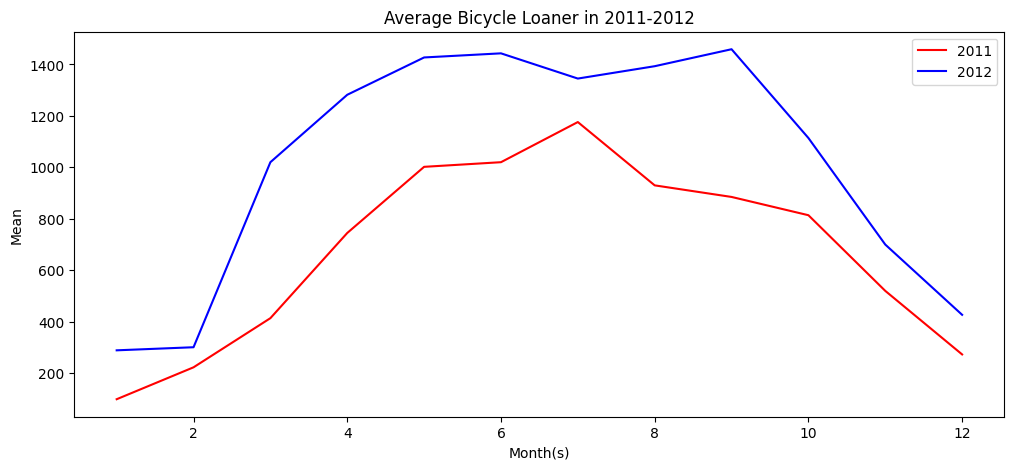

In [57]:
#Menambah lebar kanvas
plt.figure(figsize=(12,5))
#Plot rata-rata dari peminjam sepeda tahun  2011
plt.plot(groupedByMonth2011.index, groupedByMonth2011['casual']['mean'], color='red', label='2011')
#Plot rata-rata dari peminjam sepeda tahun  2012
plt.plot(groupedByMonth2012.index, groupedByMonth2012['casual']['mean'], color='blue', label='2012')
plt.title('Average Bicycle Loaner in 2011-2012')
plt.xlabel('Month(s)')
plt.ylabel('Mean')
plt.legend()
plt.show()

Data Rata-Rata Peminjam Terdaftar pada Tahun 2011-2012

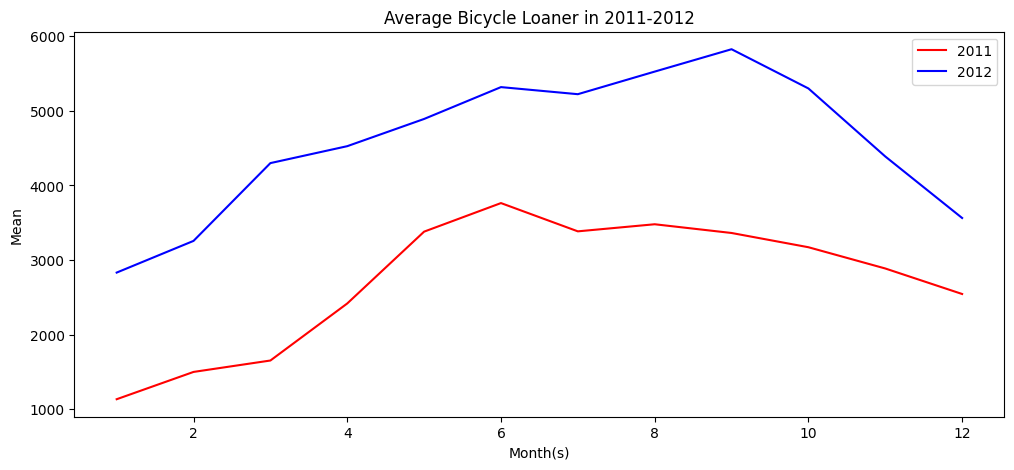

In [63]:
#Menambah lebar kanvas
plt.figure(figsize=(12,5))
#Plot rata-rata dari peminjam sepeda tahun  2011
plt.plot(groupedByMonth2011.index, groupedByMonth2011['registered']['mean'], color='red', label='2011')
#Plot rata-rata dari peminjam sepeda tahun  2012
plt.plot(groupedByMonth2012.index, groupedByMonth2012['registered']['mean'], color='blue', label='2012')
plt.title('Average Bicycle Loaner in 2011-2012')
plt.xlabel('Month(s)')
plt.ylabel('Mean')
plt.legend()
plt.show()

Jawab:
Dari hasil analisis dan visualisasi data di atas, dapat disimpulkan bahwa terdapat **kenaikan** jumlah rata-rata peminjam dari tahun 2011 ke 2012. Hal ini menjadi tolak ukur bahwa bisnis yang sedang berjalan dapat dilanjutkan.

## Pertanyaan 2:

Jawaban dari pertanyaan ini adalah pembahasan-pembahasan pada sesi menjawab pertanyaan di proses EDA. Yaitu ketika menjawab semua pertanyaan, terkecuali pertanyaan ke-5 (Karena sudah dibahas pada pertanyaan 1)

### Visualisasi Alasan 1

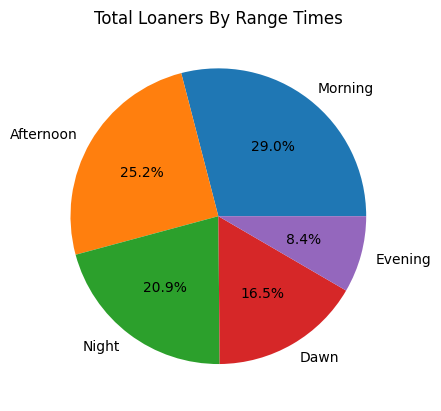

In [58]:
sumRangeTimes = groupedByRangeTimes

plt.pie(
    x=sumRangeTimes.values,
    labels=sumRangeTimes.index,
    autopct='%1.1f%%',
    colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'],
)

plt.title('Total Loaners By Range Times')
plt.show()

### Visualisasi Alasan 2

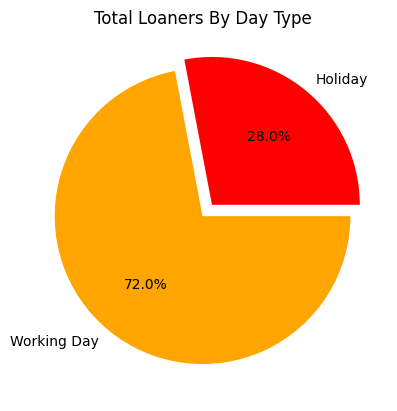

In [59]:
meanDayTypes = groupedByDayType[('cnt', 'sum')]

plt.pie(
    x=meanDayTypes.values,
    labels=meanDayTypes.index,
    autopct='%1.1f%%',
    colors=['red', 'orange'],
    explode=[0.1, 0]
)

plt.title('Total Loaners By Day Type')
plt.show()

### Visualisasi Alasan 3

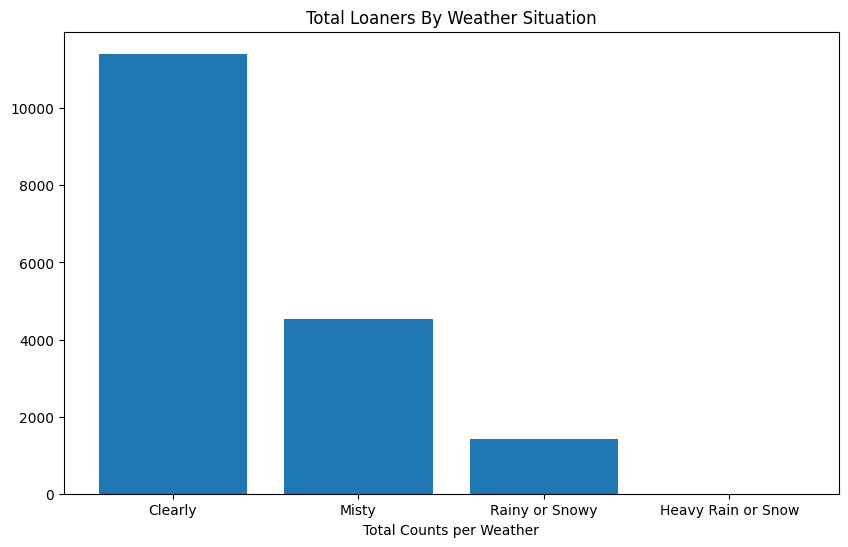

In [60]:
# Mengurutkan data dari jumlah tertinggi ke terendah
groupedByWeather.sort_values(ascending=False, inplace=True)

fig, ax = plt.subplots(figsize=(10, 6))
# Plotting visualisasi
plt.bar(x=groupedByWeather.index, height=groupedByWeather.values)
plt.title('Total Loaners By Weather Situation')
plt.xlabel('Total Counts per Weather')
plt.show()

### Visualisasi Alasan 4

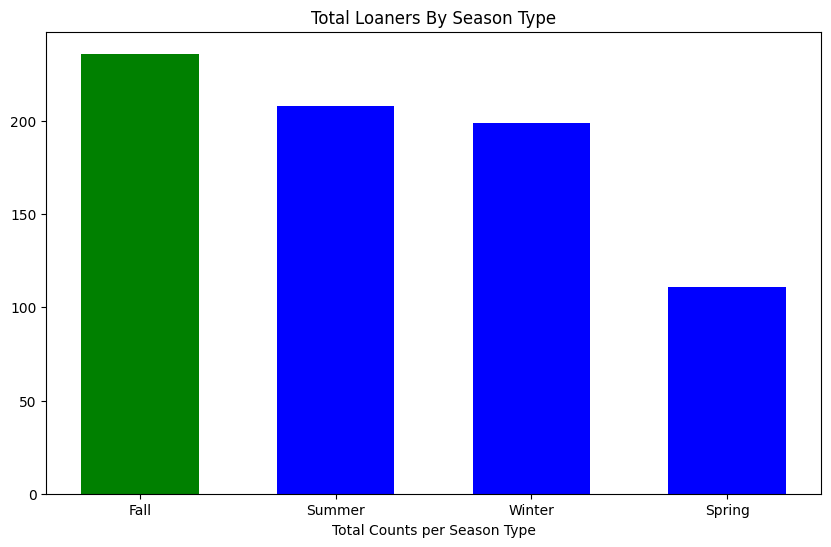

In [61]:
# Mengurutkan data dari jumlah tertinggi ke terendah
groupedBySeason.sort_values(ascending=False, inplace=True)

fig, ax = plt.subplots(figsize=(10, 6))
# Plotting visualisasi
plt.bar(x=groupedBySeason.index, height=groupedBySeason.values, color=['green', 'blue', 'blue', 'blue'], width=0.6)
plt.title('Total Loaners By Season Type')
plt.xlabel('Total Counts per Season Type')
plt.show()

### Visualisasi Alasan 6

C:\Users\legion\AppData\Local\Temp\ipykernel_3260\958034875.py:5: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend('Range Times Clustered', labels=['Dini Hari', 'Pagi Hari', 'Siang Hari', 'Sore Hari', 'Malam Hari'])


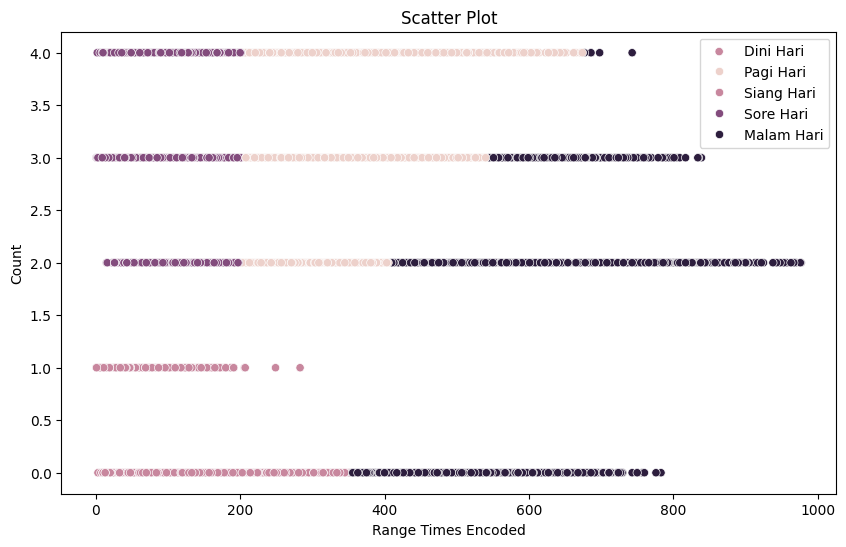

In [62]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.scatterplot(data=hoursDf, x="cnt", y="range_times_encoded", hue="range_times_clustered", ax=ax)

ax.legend('Range Times Clustered', labels=['Dini Hari', 'Pagi Hari', 'Siang Hari', 'Sore Hari', 'Malam Hari'])
plt.title('Scatter Plot')
plt.xlabel('Range Times Encoded')
plt.ylabel('Count')
plt.show()

## Conclusion

- Pertanyaan 1


> Dari hasil analisis di atas, dapat disimpulkann bahwa banyak rata-rata peminjam pada antara tahun 2011 dan 2012 mengalami **peningkatan**. Hal itu dapat dilihat pada visualisasi data pertanyaan 1.

> Hal ini menandakan bahwa realisasi bisnis yang sudah dilakukan cukup baik dalam menarik perhatian pengguna.


- Pertanyaan 2

> Dari hasil analisis di atas, terdapat faktor-faktor yang mempengaruhi peminjam rata-rata pada setiap waktunya. Disini saya mengambil contoh range waktu pada setiap bulan dan hari per tahunnya. Mengingat adanya kenaikan dan penurunan frekuensi peminjam di setiap tahunnya. Untuk faktor-faktornya adalah sebagai berikut:

>> 1. Range Waktu
>>>   Pada range-range waktu tertentu, misalnya pagi dan siang hari, pengguna cenderung melakukan aktifitas di luar ruangan. Sebagian besar membutuhkan alat transportasi untuk menjangkau tempat yang akan dituju. Atau hanya sekedar melakukan olahraga. Maka dari itu, grafik menunjukkan perbedaan banyak pengguna di range-range waktu tertentu. Pada hasil analisis ini, **pagi** dan **siang** hari adalah waktu yang paling banyak jumlah peminjamnya.
>> 2. Tipe Hari Berdasarkan Rutinitas
>>>   Berhubungan dengan jawaban poin 1, pengguna cenderung menggunakan sepeda sebagai alat transportasi pada saat ingin melakukan perjalanan di suatu tempat. Dengan asumsi bahwa pengguna melakukannya pada saat **hari kerja** atau hari produktif (Working day).
>> 3. Cuaca
>>>   Keberadaan cuaca ini sangat penting bagi pengguna untuk memutuskan berpergian keluar rumah. Sebab, dengan cuaca yang tepat, maka pengguna tidak perlu repot-repot untuk mempersiapkan jas hujan, payung, ataupun alat lainnya untuk melindungi diri dari basah air hujan ataupun salju. Maka kesimpulannya adalah pengguna akan sering menggunakan sepeda pada cuaca **cerah** (clearly).
>> 4. Musim
>>>   Berhubungan dengan adanya cuaca di atas (poin 4), maka musimlah yang menentukan kecenderungan cuaca seperti apa pada hari-hari itu. Maka dari itu, dapat disimpulkan bahwa **musim gugur** (fall) adalah musim dengan peminjam sepeda paling banyak. Selain cuaca yang sejuk dan kering, pemandangan indah akan dedaunan yang jatuh dari ranting merupakan pemandangan yang indah bagi pengguna sepeda untuk melakukan perjalanan ataupun olahraga.

- Langkah Selanjutnya
> Langkah selanjutnya yang dapat dilakukan adalah memberikan akomodasi berupa SDM maupun stok sepeda dengan jumlah yang sekiranya optimal pada titik-titik yang sudah dijelaskan di atas. Agar dapat menarik perhatian peminjam lebih banyak, serta improvisasi strategi bisnis seperti pemberian promo pada saat titik-titik maksimal tadi, dan penawaran-penawaran menarik lainnya